# Assignment02

#### Student no : 21626934
#### Student name : Edib Hamza Arslan



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')
%matplotlib inline


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Table of Content

[Purpose](#purpose)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling for Clustering](#clusteringmodel)  
[Clustering results](#clustering)    
[Modeling for Classification](#classificationmodel)  
[Evaluation](#evaluation)  
[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

Describe the aim of this assigment here. What are the questions you are trying to solve?

* In this assignment, our aim is classified the bean types. There are totaly 7 different type. The dataset has 17 columns. We try to solve predict right bean which given features. 

## Data Understanding<a class="anchor" id="data_understanding"></a>

In [2]:
DATA_PATH = 'Data/data.csv'

In [3]:
df = pd.read_csv(DATA_PATH)

In [4]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [5]:
# Targets: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df['Area'] = df['Area'].astype(np.float64)
df['ConvexArea'] = df['ConvexArea'].astype(np.float64)

# There is no Nan value
df.isnull().values.any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
df.shape

(13611, 17)

<AxesSubplot:>

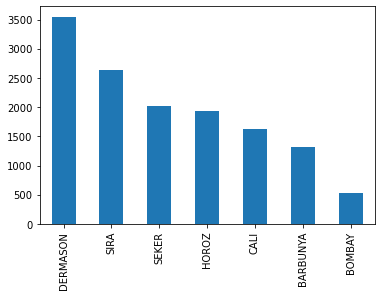

In [9]:
df['Class'].value_counts().plot(kind='bar')

Provide analysis and statistical information about the data set. How much data is there? What are the data types? What are the largest, smallest and average values of these data?

In [10]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Data Preparation<a class="anchor" id="data_preparation"></a>

Explain what kind of data transformations, feature selection and/or engineering you will perform.

I used to correlation matrix for feature selection. The correlation function is remove features bigger than threshold. The advantage is that, 
I try to decrease of features because of curse of dimensionality. The high dimension get low accuracy and slow down the training. Before the 
feature selection i get %91 accuracy with random forest classifier, after feature selection I get %93 accuracy.

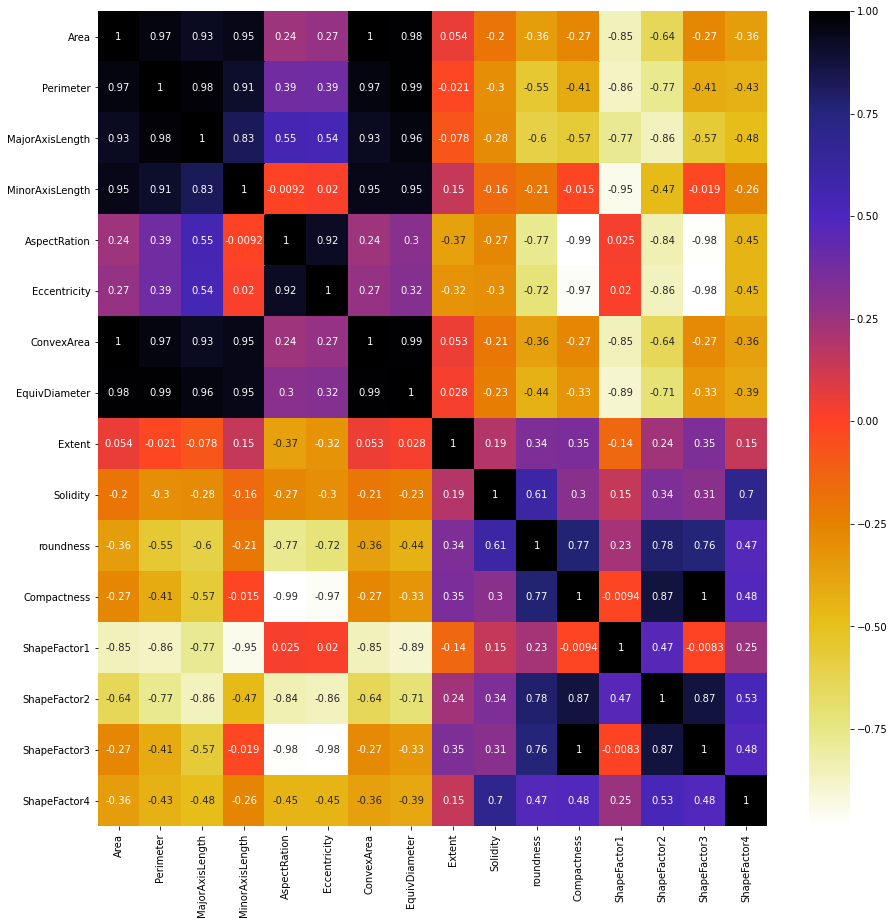

In [11]:
plt.figure(figsize=(15, 15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:
'''
 https://www.youtube.com/watch?v=FndwYNcVe0U
'''
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

The correlation function remove high correlation features, it helps to reduce dimension.

In [13]:
corr_features = correlation(df, 0.9)
print(corr_features)
df = df.drop(corr_features, axis=1)

{'EquivDiameter', 'ShapeFactor3', 'MinorAxisLength', 'Eccentricity', 'MajorAxisLength', 'Perimeter', 'ConvexArea'}


In [14]:
df

,Area,AspectRation,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
0,28395.0,1.197191,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.998724,SEKER
1,28734.0,1.097356,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.998430,SEKER
2,29380.0,1.209713,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.999066,SEKER
3,30008.0,1.153638,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.994199,SEKER
4,30140.0,1.060798,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,1.552728,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.998385,DERMASON
13607,42101.0,1.476439,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.998219,DERMASON
13608,42139.0,1.472582,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.996767,DERMASON
13609,42147.0,1.489326,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.995222,DERMASON


The X has features. The y is target classes. I turn them to 0, 1, 2, 3, 4, 5, 6. In machine learning inputs should be number, machines only understand numbers.

* 0 = BARBUNYA
* 1 = BOMBAY
* 2 = CALI
* 3 = DERMASON
* 4 = HOROZ
* 5 = SEKER
* 6 = SIRA

In [15]:
le = LabelEncoder()
y = le.fit_transform(np.array(df['Class']))
X = df.drop(labels=['Class'],axis=1)

In [16]:
X

,Area,AspectRation,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4
0,28395.0,1.197191,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.998724
1,28734.0,1.097356,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.998430
2,29380.0,1.209713,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.999066
3,30008.0,1.153638,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.994199
4,30140.0,1.060798,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.999166
...,...,...,...,...,...,...,...,...,...
13606,42097.0,1.552728,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.998385
13607,42101.0,1.476439,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.998219
13608,42139.0,1.472582,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.996767
13609,42147.0,1.489326,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.995222


In [17]:
y

array([5, 5, 5, ..., 3, 3, 3])

In [18]:
scaler = MinMaxScaler()
normalized_X = scaler.fit_transform(X)

## Modeling for Clustering <a class="anchor" id="clusteringmodel"></a>

Which model will be used? Why? What parameters?

* Kmean for clustering. I used to 7 cluster because there are total 7 different type. 

In [19]:
le.classes_

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [20]:
n_clusters = len(le.classes_)

I used pca for visualization. Because data has 2 more dimension, i have to reduce it to visualize.

In [21]:
preprocessor = Pipeline(
    [
            ("pca", PCA(n_components=2, random_state=42)),
    ]
)
clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=10,
               max_iter=300,
               random_state=42,
            ),
        ),
       ]
    )
pipe = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", clusterer)
        ]
    )

In [26]:
def plot_cluster(pipe, data):
    pca_df = pd.DataFrame(
        pipe["preprocessor"].transform(data),
        columns=["component_1", "component_2"],
    )

    pca_df["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
    pca_df["true_label"] = le.inverse_transform(y)
    
    print(pca_df)

    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(8, 8))

    scat = sns.scatterplot(
        "component_1",
        "component_2",
        s=100,
        data=pca_df,
        hue="predicted_cluster",
        style="true_label",
        palette="Set2",
    )

    scat.set_title(
        "After Clustering results from haricot bean species Data"
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    plt.show()


In [27]:
def plot_without_cluster(pipe, data):
    pca_df = pd.DataFrame(
        pipe["preprocessor"].transform(data),
        columns=["component_1", "component_2"],
    )

    pca_df["true_label"] = le.inverse_transform(y)

    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(8, 8))

    scat = sns.scatterplot(
        "component_1",
        "component_2",
        s=100,
        data=pca_df,
        style="true_label",
        palette="Set2",
    )

    scat.set_title(
        "Before clustering from haricot bean species Data"
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

    plt.show()

## Clustering results<a class="anchor" id="clustering"></a>

Present the clustering results and graphs.

        component_1  component_2  predicted_cluster true_label
0     -24653.284550    -0.356429                  3      SEKER
1     -24314.284550    -0.451370                  3      SEKER
2     -23668.284550    -0.344983                  3      SEKER
3     -23040.284550    -0.397211                  3      SEKER
4     -22908.284550    -0.509042                  3      SEKER
...             ...          ...                ...        ...
13606 -10951.284549    -0.010193                  1   DERMASON
13607 -10947.284549    -0.095527                  1   DERMASON
13608 -10909.284550    -0.093143                  1   DERMASON
13609 -10901.284549    -0.072169                  1   DERMASON
13610 -10889.284549     0.056456                  1   DERMASON

[13611 rows x 4 columns]


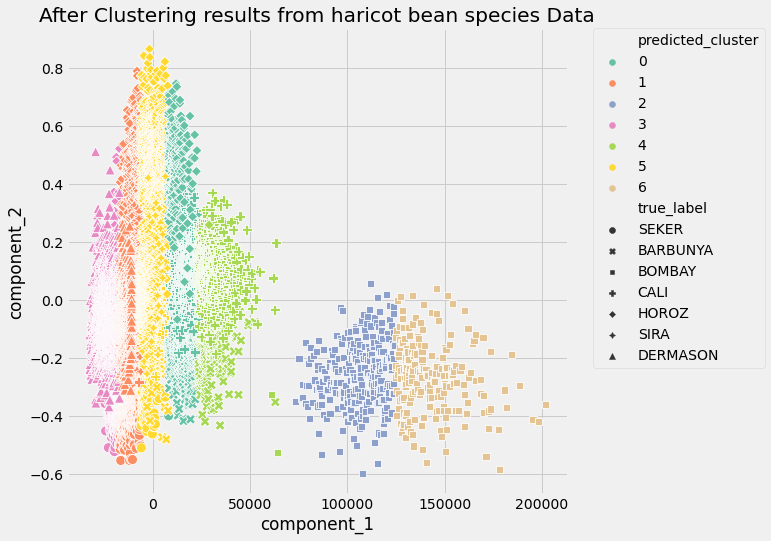

In [28]:
pipe.fit(X)
# plot_without_cluster(pipe, X)
plot_cluster(pipe, X)

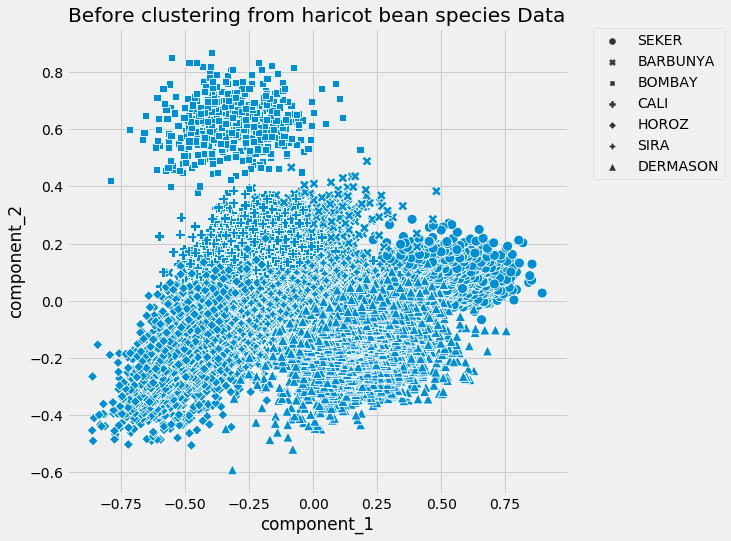

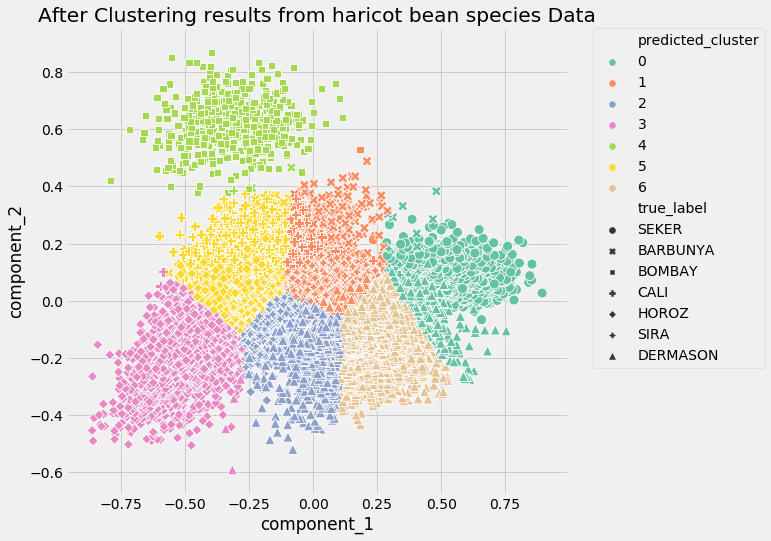

In [38]:
pipe.fit(normalized_X)
plot_without_cluster(pipe, normalized_X)
plot_cluster(pipe, normalized_X)

Evaluate your Clustering model. Provide results, tables, charts, etc.


## Modeling for Classification <a class="anchor" id="classificationmodel"></a>

Which model will be used? Why? What parameters?

* Random forest classification. I also tried naive bayes, logistic regression and svm. The random forest classification gave me high accuracy in short time.


In [39]:
# Splitting od with 0.2 partion 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Spliting nd with 0.2 partion
norm_X_train, norm_X_test, norm_y_train, norm_y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=42)

In [40]:
classifier=RandomForestClassifier()
classifier=classifier.fit(X_train, y_train)
od_predicted=classifier.predict(X_test)

In [41]:
classifier=RandomForestClassifier()
classifier=classifier.fit(norm_X_train, norm_y_train)
nd_predicted=classifier.predict(norm_X_test)

## Evaluation<a class="anchor" id="evaluation"></a>

In [42]:
def plot_confusion_matrix(predicted, title=None):
    '''https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
    '''

    # Get and reshape confusion matrix data
    matrix = confusion_matrix(norm_y_test, predicted)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = le.classes_
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model ' + title)
    plt.show()

* Original Data with %80 training data, %20 test data

In [43]:
print ('Accuracy Score :',accuracy_score(y_test, od_predicted))
print ('Report : ')
print (classification_report(y_test, od_predicted))

Accuracy Score : 0.9254498714652957
Report : 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       261
           1       1.00      1.00      1.00       117
           2       0.93      0.95      0.94       317
           3       0.90      0.92      0.91       671
           4       0.97      0.96      0.96       408
           5       0.96      0.94      0.95       413
           6       0.87      0.88      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



* Normalized Data with %80 training data, %20 test data

In [44]:
print ('Accuracy Score :',accuracy_score(norm_y_test, nd_predicted))
print ('Report : ')
print (classification_report(norm_y_test, nd_predicted))

Accuracy Score : 0.9258171134777818
Report : 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       261
           1       1.00      1.00      1.00       117
           2       0.94      0.95      0.94       317
           3       0.90      0.92      0.91       671
           4       0.97      0.96      0.96       408
           5       0.97      0.94      0.95       413
           6       0.87      0.88      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



Evaluate your model. Provide results, tables, charts, etc.

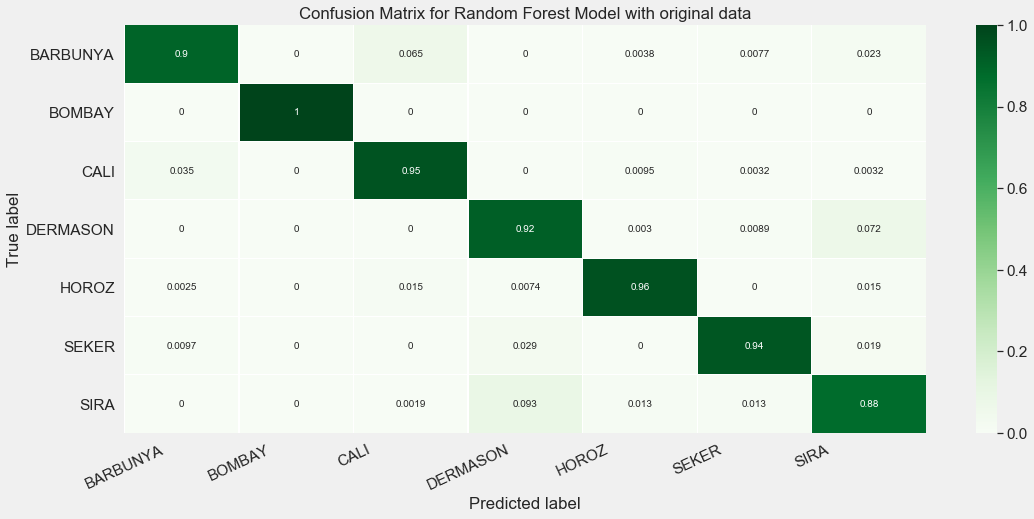

In [45]:
plot_confusion_matrix(od_predicted, 'with original data')

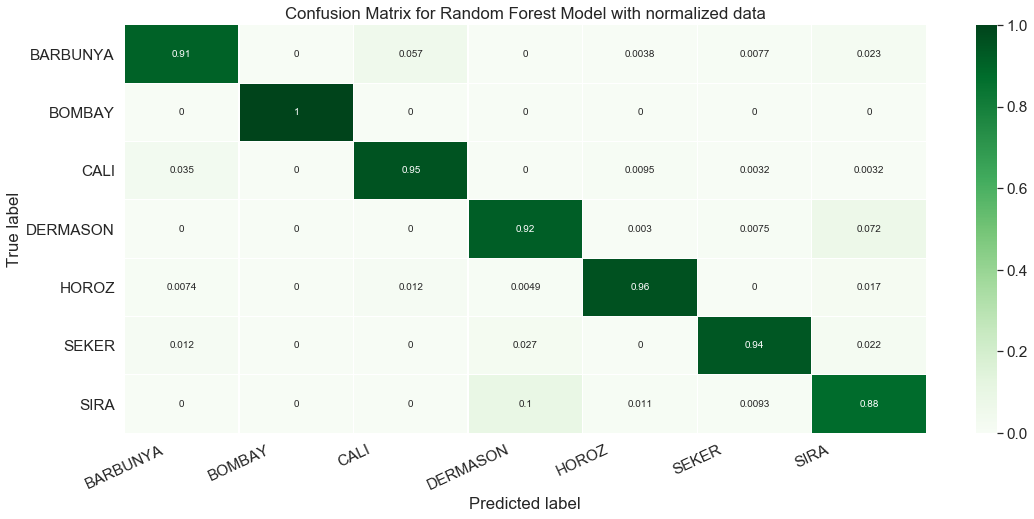

In [46]:
plot_confusion_matrix(nd_predicted, 'with normalized data')

## References<a class="anchor" id="references"></a>

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://realpython.com/k-means-clustering-python/
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
https://www.youtube.com/watch?v=FndwYNcVe0U

List all the sources you used during your work.
This includes jupyter notebooks you found on Internet.
Remeber, your work may not be an original one. However, this document must be genuine. Copy and paste kind of deliveries will be punished badly.


**Disclaimer!** <font color='grey'>This notebook was prepared by Edib Hamza Arslan as an assigment for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>